In [1]:
%matplotlib inline


Handling probe information
===========================

In order to properly spike sort, you may need to load information related to the probe you are using.
You can easily load probe information in :code:`spikeinterface.extractors` module.

Here's how!



In [2]:
import numpy as np
import spikeinterface.extractors as se

First, let's create a toy example:



In [3]:
recording, sorting_true = se.example_datasets.toy_example(duration=10, num_channels=32, seed=0)

Probe information may be required to:

- apply a channel map
- load 'group' information
- load 'location' information
- load arbitrary information

Probe information can be loaded either using a '.prb' or a '.csv' file. We recommend using a '.prb' file, since it
allows users to load several information as once.

A '.prb' file is a python dictionary. Here is the content of a sample '.prb' file (eight_tetrodes.prb), that splits
the channels in 8 channel groups, applies a channel map (reversing the order of each tetrode), and loads a 'label'
for each electrode (arbitrary information):

:code:`eight_tetrodes.prb`:

.. parsed-literal::

   channel_groups = {
       # Tetrode index
       0:
           {
             'channels': [3, 2, 1, 0],
             'geometry': [[0,0], [1,0], [2,0], [3,0]],
             'label': ['t_00', 't_01', 't_02', 't_03'],
           },
       1:
           {
             'channels': [7, 6, 5, 4],
             'geometry': [[6,0], [7,0], [8,0], [9,0]],
             'label': ['t_10', 't_11', 't_12', 't_13'],
           },
       2:
           {
             'channels': [11, 10, 9, 8],
             'geometry': [[12,0], [13,0], [14,0], [15,0]],
             'label': ['t_20', 't_21', 't_22', 't_23'],
           },
       3:
           {
             'channels': [15, 14, 13, 12],
             'geometry': [[18,0], [19,0], [20,0], [21,0]],
             'label': ['t_30', 't_31', 't_32', 't_33'],
            },
       4:
           {
             'channels': [19, 18, 17, 16],
             'geometry': [[30,0], [31,0], [32,0], [33,0]],
             'label': ['t_40', 't_41', 't_42', 't_43'],
           },
       5:
           {
             'channels': [23, 22, 21, 20],
             'geometry': [[36,0], [37,0], [38,0], [39,0]],
             'label': ['t_50', 't_51', 't_52', 't_53'],
           },
       6:
           {
             'channels': [27, 26, 25, 24],
             'geometry': [[42,0], [43,0], [44,0], [45,0]],
             'label': ['t_60', 't_61', 't_62', 't_63'],
           },
       7:
           {
             'channels': [31, 30, 29, 28],
             'geometry': [[48,0], [49,0], [50,0], [51,0]],
             'label': ['t_70', 't_71', 't_72', 't_73'],
           }
       }

You can load the probe file using the :code:`load_probe_file` function in the RecordingExtractor.
**IMPORTANT** This function returns a **new** :code:`RecordingExtractor` object:



In [4]:
recording_tetrodes = recording.load_probe_file(probe_file='eight_tetrodes.prb')

Now let's check what we have loaded:



In [5]:
print('Channel ids:', recording_tetrodes.get_channel_ids())
print('Loaded properties', recording_tetrodes.get_shared_channel_property_names())
print('Label of channel 0:', recording_tetrodes.get_channel_property(channel_id=0, property_name='label'))

Channel ids: [0, 1, 2, 3, 7, 6, 5, 4, 11, 10, 9, 8, 15, 14, 13, 12, 19, 18, 17, 16, 23, 22, 21, 20, 27, 26, 25, 24, 31, 30, 29, 28]
Loaded properties ['group', 'label', 'location']
Label of channel 0: t_00


and let's plot the probe layout:



In [6]:
import spikeinterface.widgets as sw
w_el_tetrode = sw.plot_electrode_geometry(recording_tetrodes)

Alternatively, one can use a '.csv' file to load the electrode locations. Let's create a '.csv' file
with 2D locations in a circular layout:



In [12]:
delta_deg = 2 * np.pi / recording.get_num_channels()
with open('circular_layout.csv', 'w') as f:
    for i in range(recording.get_num_channels()):
        angle = i * delta_deg
        radius = 50
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        f.write(str(x) + ',' + str(y) + '\n')

When loading the probe file as a '.csv' file, we can also pass a 'channel_map' and a 'channel_groups' arguments.
For example, let's reverse the channel order and split the channels in two groups:



In [13]:
channel_map = list(range(recording.get_num_channels()))[::-1]
channel_groups = np.array(([0] * int(recording.get_num_channels())))
channel_groups[int(recording.get_num_channels() / 2):] = 1

print('Created channel map', channel_map)
print('Created channel groups', channel_groups)

Created channel map [31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Created channel groups [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


We can now load the probe information from the newly created '.csv' file:



In [14]:
recording_circ = recording.load_probe_file(probe_file='circular_layout.csv',
                                           channel_map=channel_map,
                                           channel_groups=channel_groups)

Here is now the probe layout:



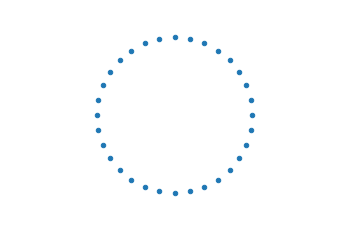

In [15]:
w_el_circ = sw.plot_electrode_geometry(recording_circ)

Let's check that we loaded the information correctly:



In [16]:
print('Loaded channel ids', recording_circ.get_channel_ids())
print('Loaded channel groups', recording_circ.get_channel_groups())

Loaded channel ids [31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Loaded channel groups [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
